In [1]:
import numpy as np
import pandas as pd
from pymed import PubMed

In [2]:
pubmed = PubMed(tool="LitSearch", email="harry.gordon@nhm.ac.uk")
results = pubmed.query('(West Africa) AND ((Rodent) OR (Rodent trap) AND (("1900/01/01"[Date - Publication] : "2022/05/01"[Date - Publication])))', max_results=3000)

In [3]:
doi = []
authors = []
title = []
keywords = []
publication_date = []
abstract = []
journal = []

for article in results:
    doi.append(article.doi)
    authors.append(article.authors)
    title.append(article.title)
    #if article.keywords:
       # if None in article.keywords:
         #   article.keywords.remove(None)
        #keywords = '", "'.join(article.keywords)
    publication_date.append(article.publication_date)
    abstract.append(article.abstract)
    #journal.append(article.journal)


df = pd.DataFrame({'doi':doi,
                   'authors':authors,
                   'title':title,
                   #'keywords':keywords,
                   'year':publication_date,
                   'abstract':abstract#,'journal':journal
                  })

In [4]:
len(df)

2474

In [13]:
print(df.isna().sum())

doi         385
authors       0
title         0
year          0
abstract    282
dtype: int64


In [5]:
df = df.dropna()
len(df)

2163

In [6]:
df1 = pd.read_csv("included_studies.csv")
df1['link'] = df1['link'].str.replace("https://", "")
df1['link'] = df1['link'].str.replace("http://", "")
df1 = [row for row in df1["link"] if row[:3] == "doi"]
df1 = [w.replace('doi.org/', '') for w in df1]

In [14]:
rslt_df = df[df['doi'].isin(df1)] 
len(rslt_df)

25

In [18]:
df['data_avail'] = np.where(df['doi'].isin(df1), "yes", "no")
df

,doi,authors,title,publication_date,abstract,data_avail
0,10.1051/parasite/2024009,"[{'lastname': 'Juban', 'firstname': 'Paola', '...",Trypanosoma brucei gambiense group 2 experimen...,2024-03-23,Trypanosoma brucei gambiense (Tbg) group 2 is ...,no
1,10.1002/jnr.25320,"[{'lastname': 'Marx', 'firstname': 'Harry', 'i...",Large nesting expression in deer mice remains ...,2024-03-21,Visual stimuli and limbic activation varyingly...,no
2,10.1016/j.pestbp.2023.105767,"[{'lastname': 'Takeda', 'firstname': 'Kazuki',...",Sensitivity assessment of diphacinone by pharm...,2024-03-09,The Bonin Archipelago is a United Nations Educ...,no
3,10.1016/j.ejphar.2024.176434,"[{'lastname': 'Bernardus Saayman', 'firstname'...","Sildenafil, alone and in combination with imip...",2024-03-09,Major depressive disorder (MDD) represents a c...,no
4,10.1016/j.virusres.2023.199255,"[{'lastname': 'Essaidi-Laziosi', 'firstname': ...",Distinct phenotype of SARS-CoV-2 Omicron BA.1 ...,2024-02-23,SARS-CoV-2's genetic plasticity has led to sev...,no
...,...,...,...,...,...,...
2485,10.1080/00034983.1975.11686983,"[{'lastname': 'Moore', 'firstname': 'D L', 'in...",Arthropod-borne viral infections of man in Nig...,1975-03-01,"During the years 1964 to 1970, 171 arboviruses...",no
2509,10.1126/science.185.4147.263,"[{'lastname': 'Monath', 'firstname': 'T P', 'i...",Lassa virus isolation from Mastomys natalensis...,1974-07-19,Lassa fever is a severe febrile illness of man...,yes
2515,10.1017/s0022172400023627,"[{'lastname': 'Sowa', 'firstname': 'J', 'initi...",Serotypes of trachoma agent isolated in the Ga...,1974-06-01,Of 60 TRIC agents isolated from Gambian childr...,no
2547,10.1055/s-0028-1099575,"[{'lastname': 'Ogan', 'firstname': 'A U', 'ini...",An oxytocic extractive from a West African cuc...,1972-06-01,In south-east Nigeria the plant Mormordica cab...,no


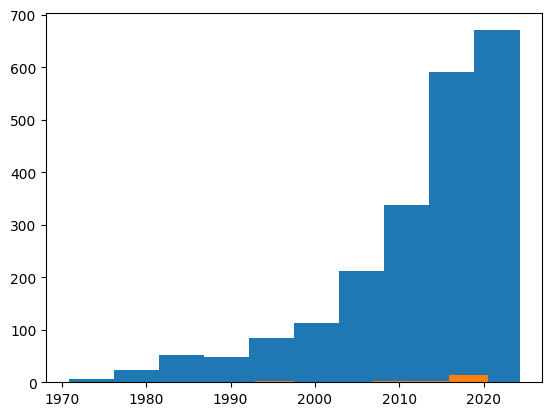

In [28]:
import matplotlib.pyplot as plt
y = df["data_avail"] == "yes"
x = df["data_avail"] == "no"
plt.hist(df[x]["publication_date"])
plt.hist(df[y]["publication_date"])
plt.show()

In [5]:
df.to_csv("pm_search.csv")